In [1]:
# TRUMPTER SWAN : 0
# QUETZAL : 1
# FLAMINGO : 2
# PELICAN : 3
# WILD TURKEY : 4
# BALD EAGLE : 5
# INDIGO BUNTING : 6
# TOUCHAN : 7
# SNOWY OWL : 8
# AMERICAN GOLDFINCH : 9

In [1]:
# Imports
from matplotlib import image
from matplotlib import pyplot
import pandas as pd
import os
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
def convert_to_feature_vector(image_path):
    """
    Convert the given image to a feature vector in the form of a pixel array.
    :param image_path: relative path to the desired image
    """
    
    # Get a pixel array of the given image
    pixel_arr = image.imread(image_path)

    # Get dimentions of the given image
    length, height, depth = pixel_arr.shape
    
    # Return reshaped 1-D array
    return pixel_arr.reshape((length * height * depth, 1)).flatten()

In [3]:
# Map species names to numeric lables
species_map = {'TRUMPTER SWAN': 0, 'QUETZAL': 1, 'FLAMINGO': 2, 'PELICAN': 3, 'WILD TURKEY': 4, 
               'BALD EAGLE': 5, 'INDIGO BUNTING': 6, 'TOUCHAN': 7, 'SNOWY OWL': 8, 'AMERICAN GOLDFINCH': 9}

def get_test_train_sets():
    # Load the training data
    train_df = pd.read_csv('./dataset/10_Bird_Species_train.csv')

    # Replace species names with their numeric labels
    train_df = train_df.replace({'label': species_map})

    # Get the training feature vectors
    train_df['feature_vector'] = train_df['path'].apply(lambda row: convert_to_feature_vector(row))
    
    # Load the testing data
    test_df = pd.read_csv('./dataset/10_Bird_Species_test.csv')
    
    # Replace species names with their numberic labels
    test_df = test_df.replace({'label': species_map})
    
    # Get the test feature vectors
    test_df['feature_vector'] = test_df['path'].apply(lambda row: convert_to_feature_vector(row))
    
    # Return the x train, y train, x test, y test
    return np.stack(train_df['feature_vector']), train_df['label'], np.stack(test_df['feature_vector']), test_df['label']

In [4]:
# Get the training data and labels
x_train, y_train, x_test, y_test = get_test_train_sets()

In [5]:
# Train a KNN model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
# Get the test set accuracy score
print(metrics.accuracy_score(y_test, model.predict(x_test)))

0.68


In [13]:
y_pred=model.predict(x_test)
acc=metrics.accuracy_score(y_pred,y_test)
cm=metrics.confusion_matrix(y_pred,y_test)

Text(0.5, 1.0, 'Accuracy Score: 0.68')

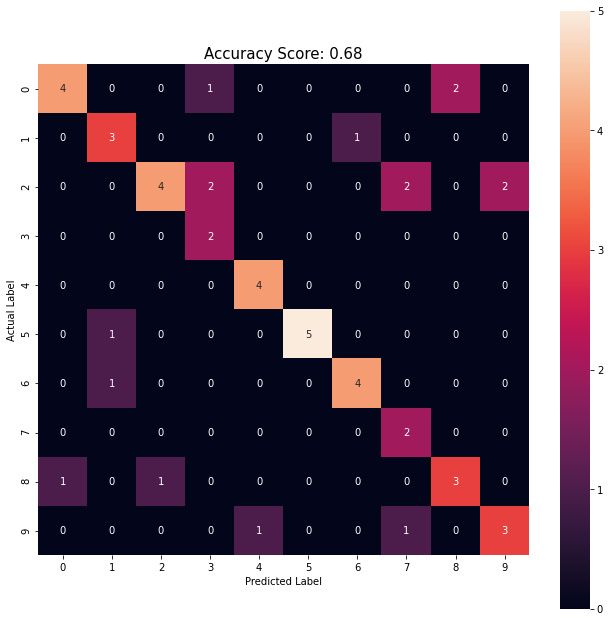

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(11,11))
sns.heatmap(cm, square=True, annot=True)

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title='Accuracy Score: {0}'.format(acc)

plt.title(all_sample_title, size=15)